# Sheet 03

## Preamble

Autors: Marten Ringwelski, Nico Ostermann, Simon Liessem

Note that this notebook MUST be executed in order to get everything to work.
The tasks can't be run individually. 

Also eCampus does not allow for uploading nested directory structures which makes it hard to properly organize the files. The files are expected to be in the `data` directory which itself is placed next to this notebook.

If you extract the zip file we handed in everything should work just fine.

Autoformatting if `jupyter-black` is installed.

In [1]:
try:
    import black
    import jupyter_black

    jupyter_black.load(
        lab=False,
        line_length=79,
        verbosity="DEBUG",
        target_version=black.TargetVersion.PY310,
    )
except ImportError:
    pass

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

Import all we weed and more.

Set seaborn default theme

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.feature_selection import f_classif, SelectKBest
import math as m
import plotly.express as px

Set seaborn default theme

In [3]:
sns.set_theme()

If needed tweak parameters of matplotlib.
Here we increase the size and dpi to bet a bigger but still high-res image.

In [4]:
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = (20, 15)
%matplotlib inline

## Exercise 1

### a)

Read the dataset with Pandas and store dataframe.
Then delete ever line that is not of one of the classes c-CS-s or t-CS-s.

In [5]:
df = pd.read_excel("data/Data_Cortex_Nuclear.xls")
df_subgroups = df[
    np.logical_or(df["class"] == "c-CS-s", df["class"] == "t-CS-s")
].copy()

### b)

First we print the amount of mice depending on the class.
This is 135 for the c-CS-s mice and  105 for the t-CS-s mice.

In [6]:
df_subgroups["class"].value_counts()

c-CS-s    135
t-CS-s    105
Name: class, dtype: int64

Get array of 0 and 1 to scale the color depending on the class.

In [7]:
colors = np.where(df_subgroups["class"] == "t-CS-s", 0, 1)

Now we make a parallel plot. We plot the dataframe with the 5 proteins named in the task and use different colors for the 2 classes t-CS-s and c-CS-s.

In [8]:
fig = px.parallel_coordinates(
    df_subgroups,
    color=colors,
    dimensions=["pPKCG_N", "pP70S6_N", "pS6_N", "pGSK3B_N", "ARC_N"],
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=0.5,
)
fig.show()

## Exercise 2

See the end of the pdf.

## Exercise 3

### a)

Note how we cannot use the "code" clumn as index as int contains 53 duplicates.

In [9]:
df = pd.read_excel("data/breast-cancer-wisconsin.xlsx")

From the below we can see that we have 16 missing values in the column bareNuc (Bare Nuclei).

In [10]:
df.isna().aggregate(np.sum)

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

As these are less than 3% of all the data and about 7% of patients with a malignant tumor we decide to just leave the patiens with missing values out.

In [11]:
df = df.dropna()

## b)

In [12]:
data_columns = df.columns.difference(["class", "code"])

In [13]:
n_components = len(data_columns)

In [14]:
df_wo_meta = df[data_columns]

In [15]:
pca = sk.decomposition.PCA(n_components=n_components)

Next we did PCA with all 9 columns we have in out dataframe for PCA.
we first get a PCA instance, then fit it to our data and after that transform our data according to the PCA result.
To make a plot where we can see how high the variance is depending on the amount of components we make the sumcum over the variance each component yields.

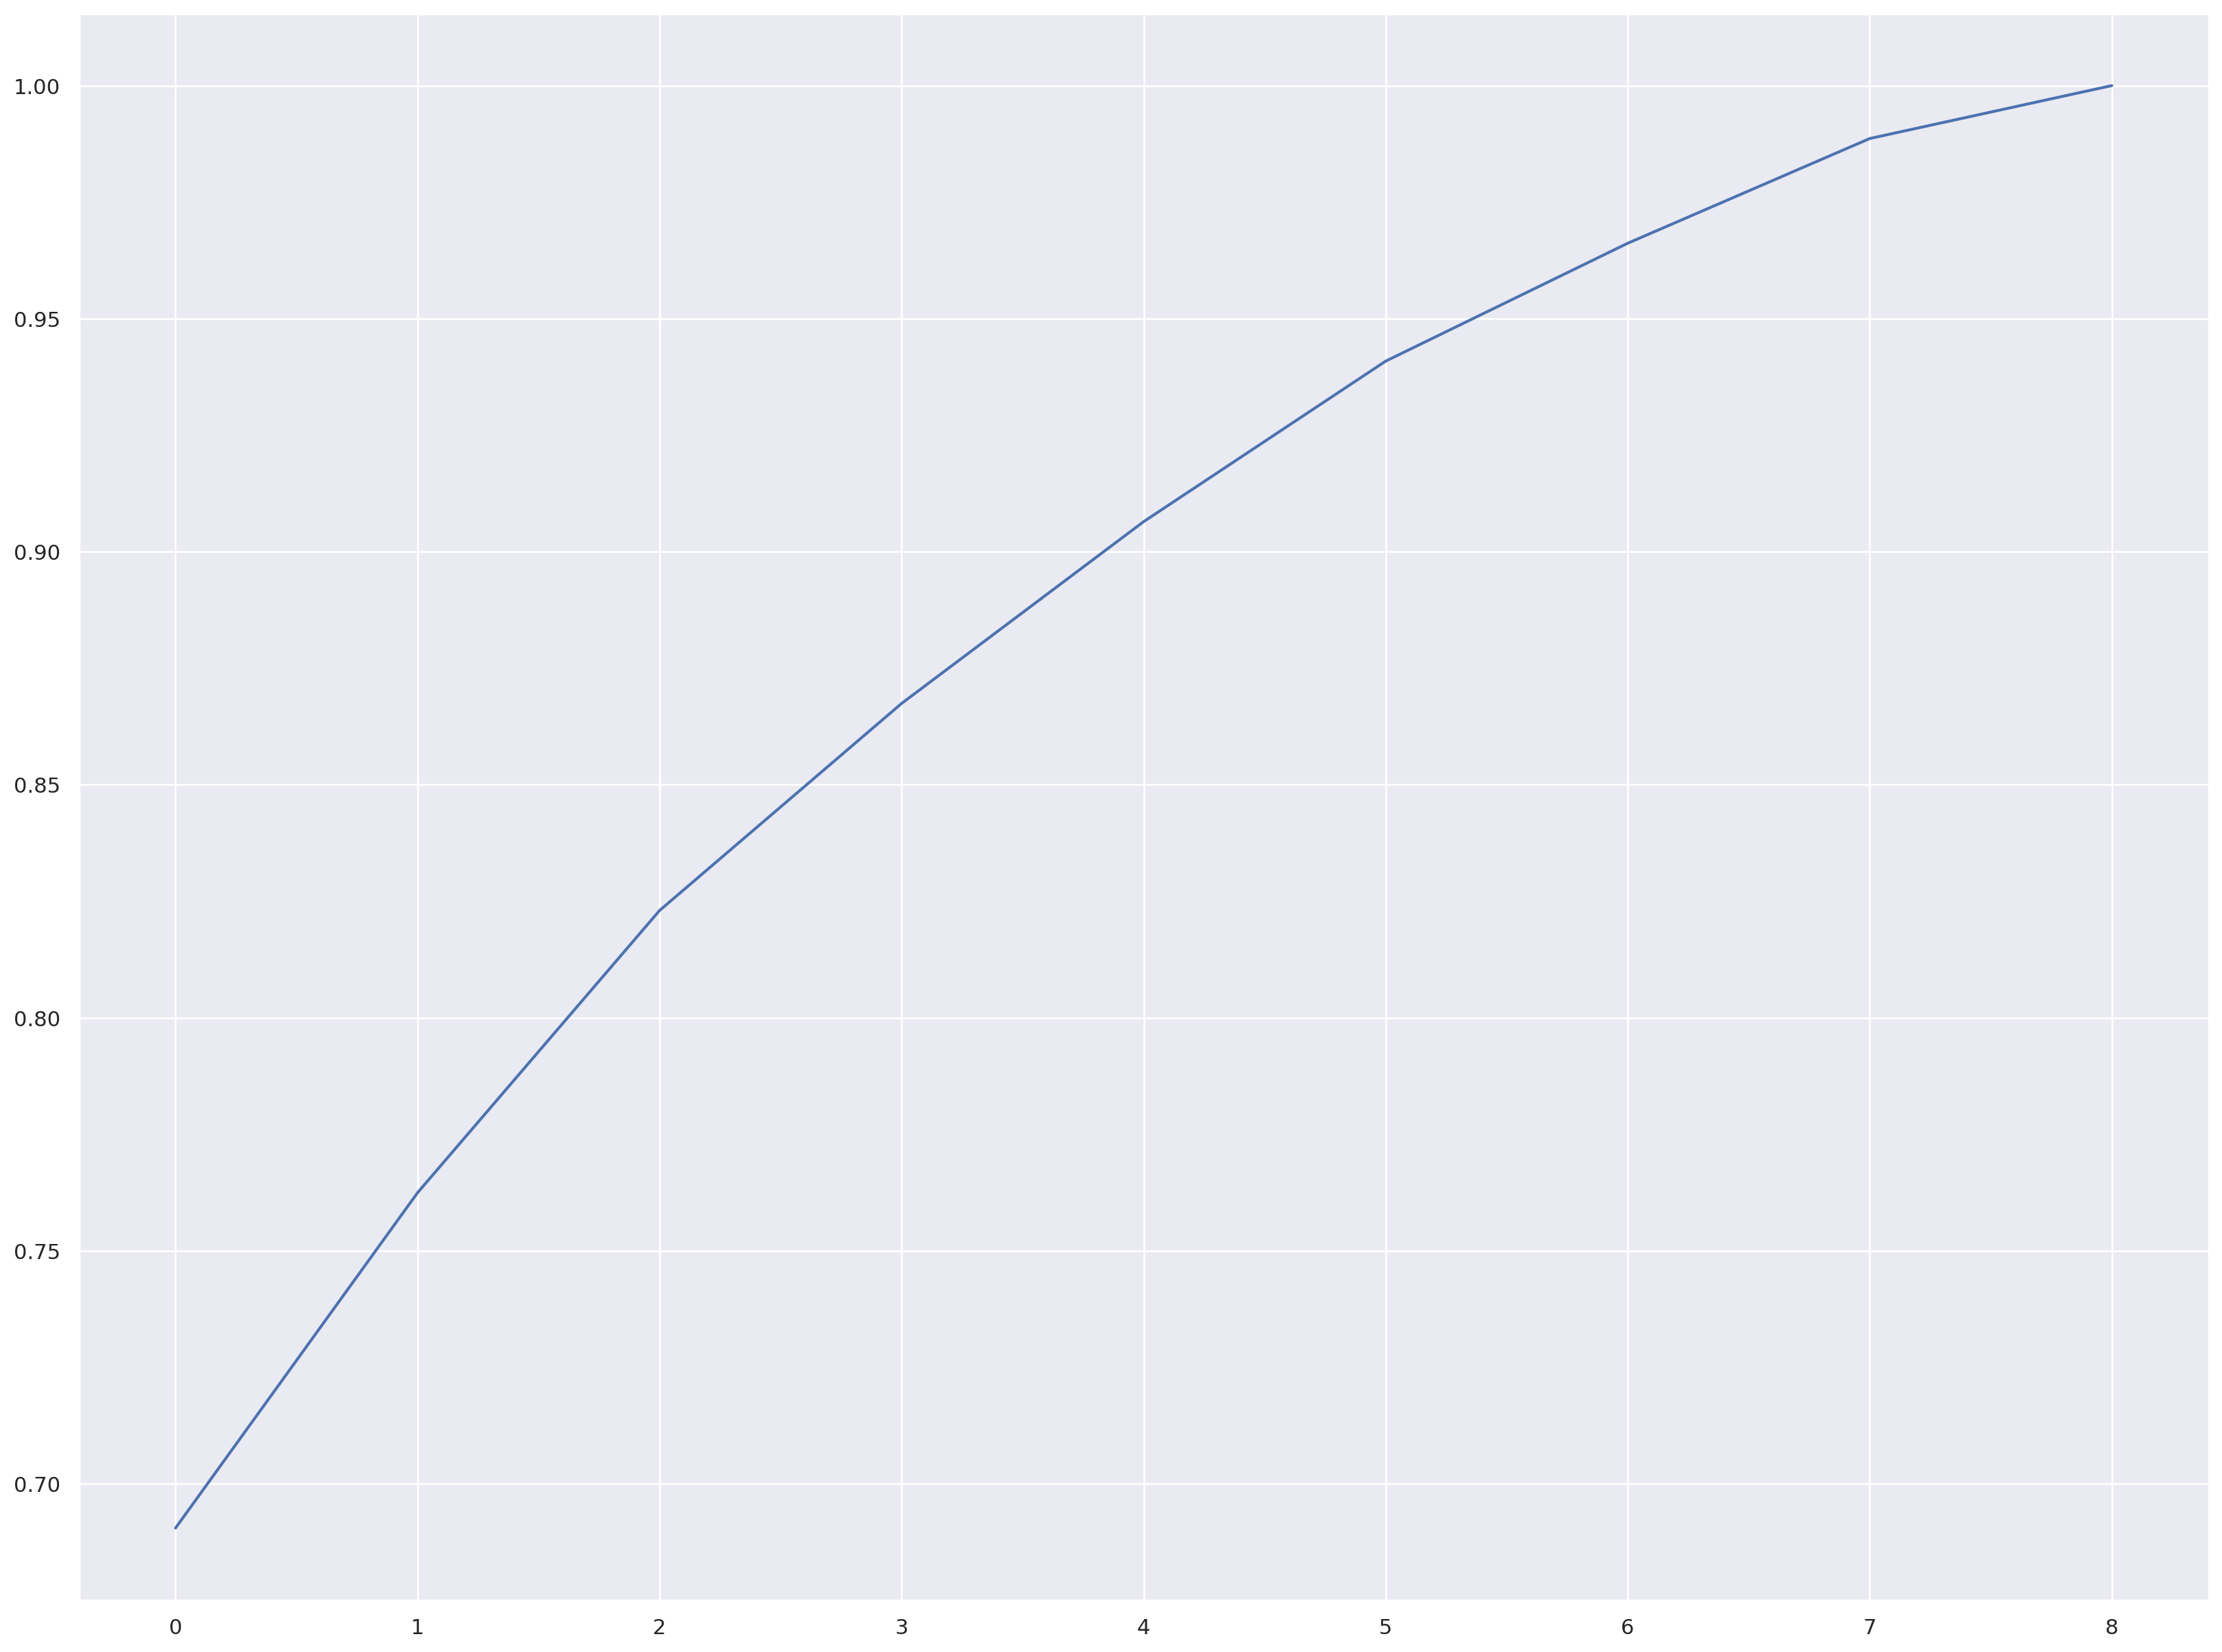

In [40]:
pca.fit(df_wo_meta)
x_transformed = pca.transform(df_wo_meta)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

To find out how many components we need to at least 90% of the variance we computed PCA in such a way that we get a PCA transformation that yields 90% of the variance.
After this we print the shape of our transformed data and can see that we need 5 components to have at least 90% of the variance covered.

In [18]:
pca_most = sk.decomposition.PCA(n_components=0.9)
pca_most.fit(df_wo_meta)
transformed_most = pca_most.transform(df_wo_meta)

In [30]:
n_principal_components = transformed_most.shape[1]

In [31]:
n_principal_components

5

### c)

To make scatter plot matrix we now create a dataframe from the PCA result.
We then make a column with the class names and assign each sample a class wether its malignant or benign.
Then we use this dataframe to make a scatterplot with the class_names as hue.

In [34]:
df_most = pd.DataFrame(
    transformed_most,
    columns=[
        f"Principal Component {i}" for i in range(n_principal_components)
    ],
)

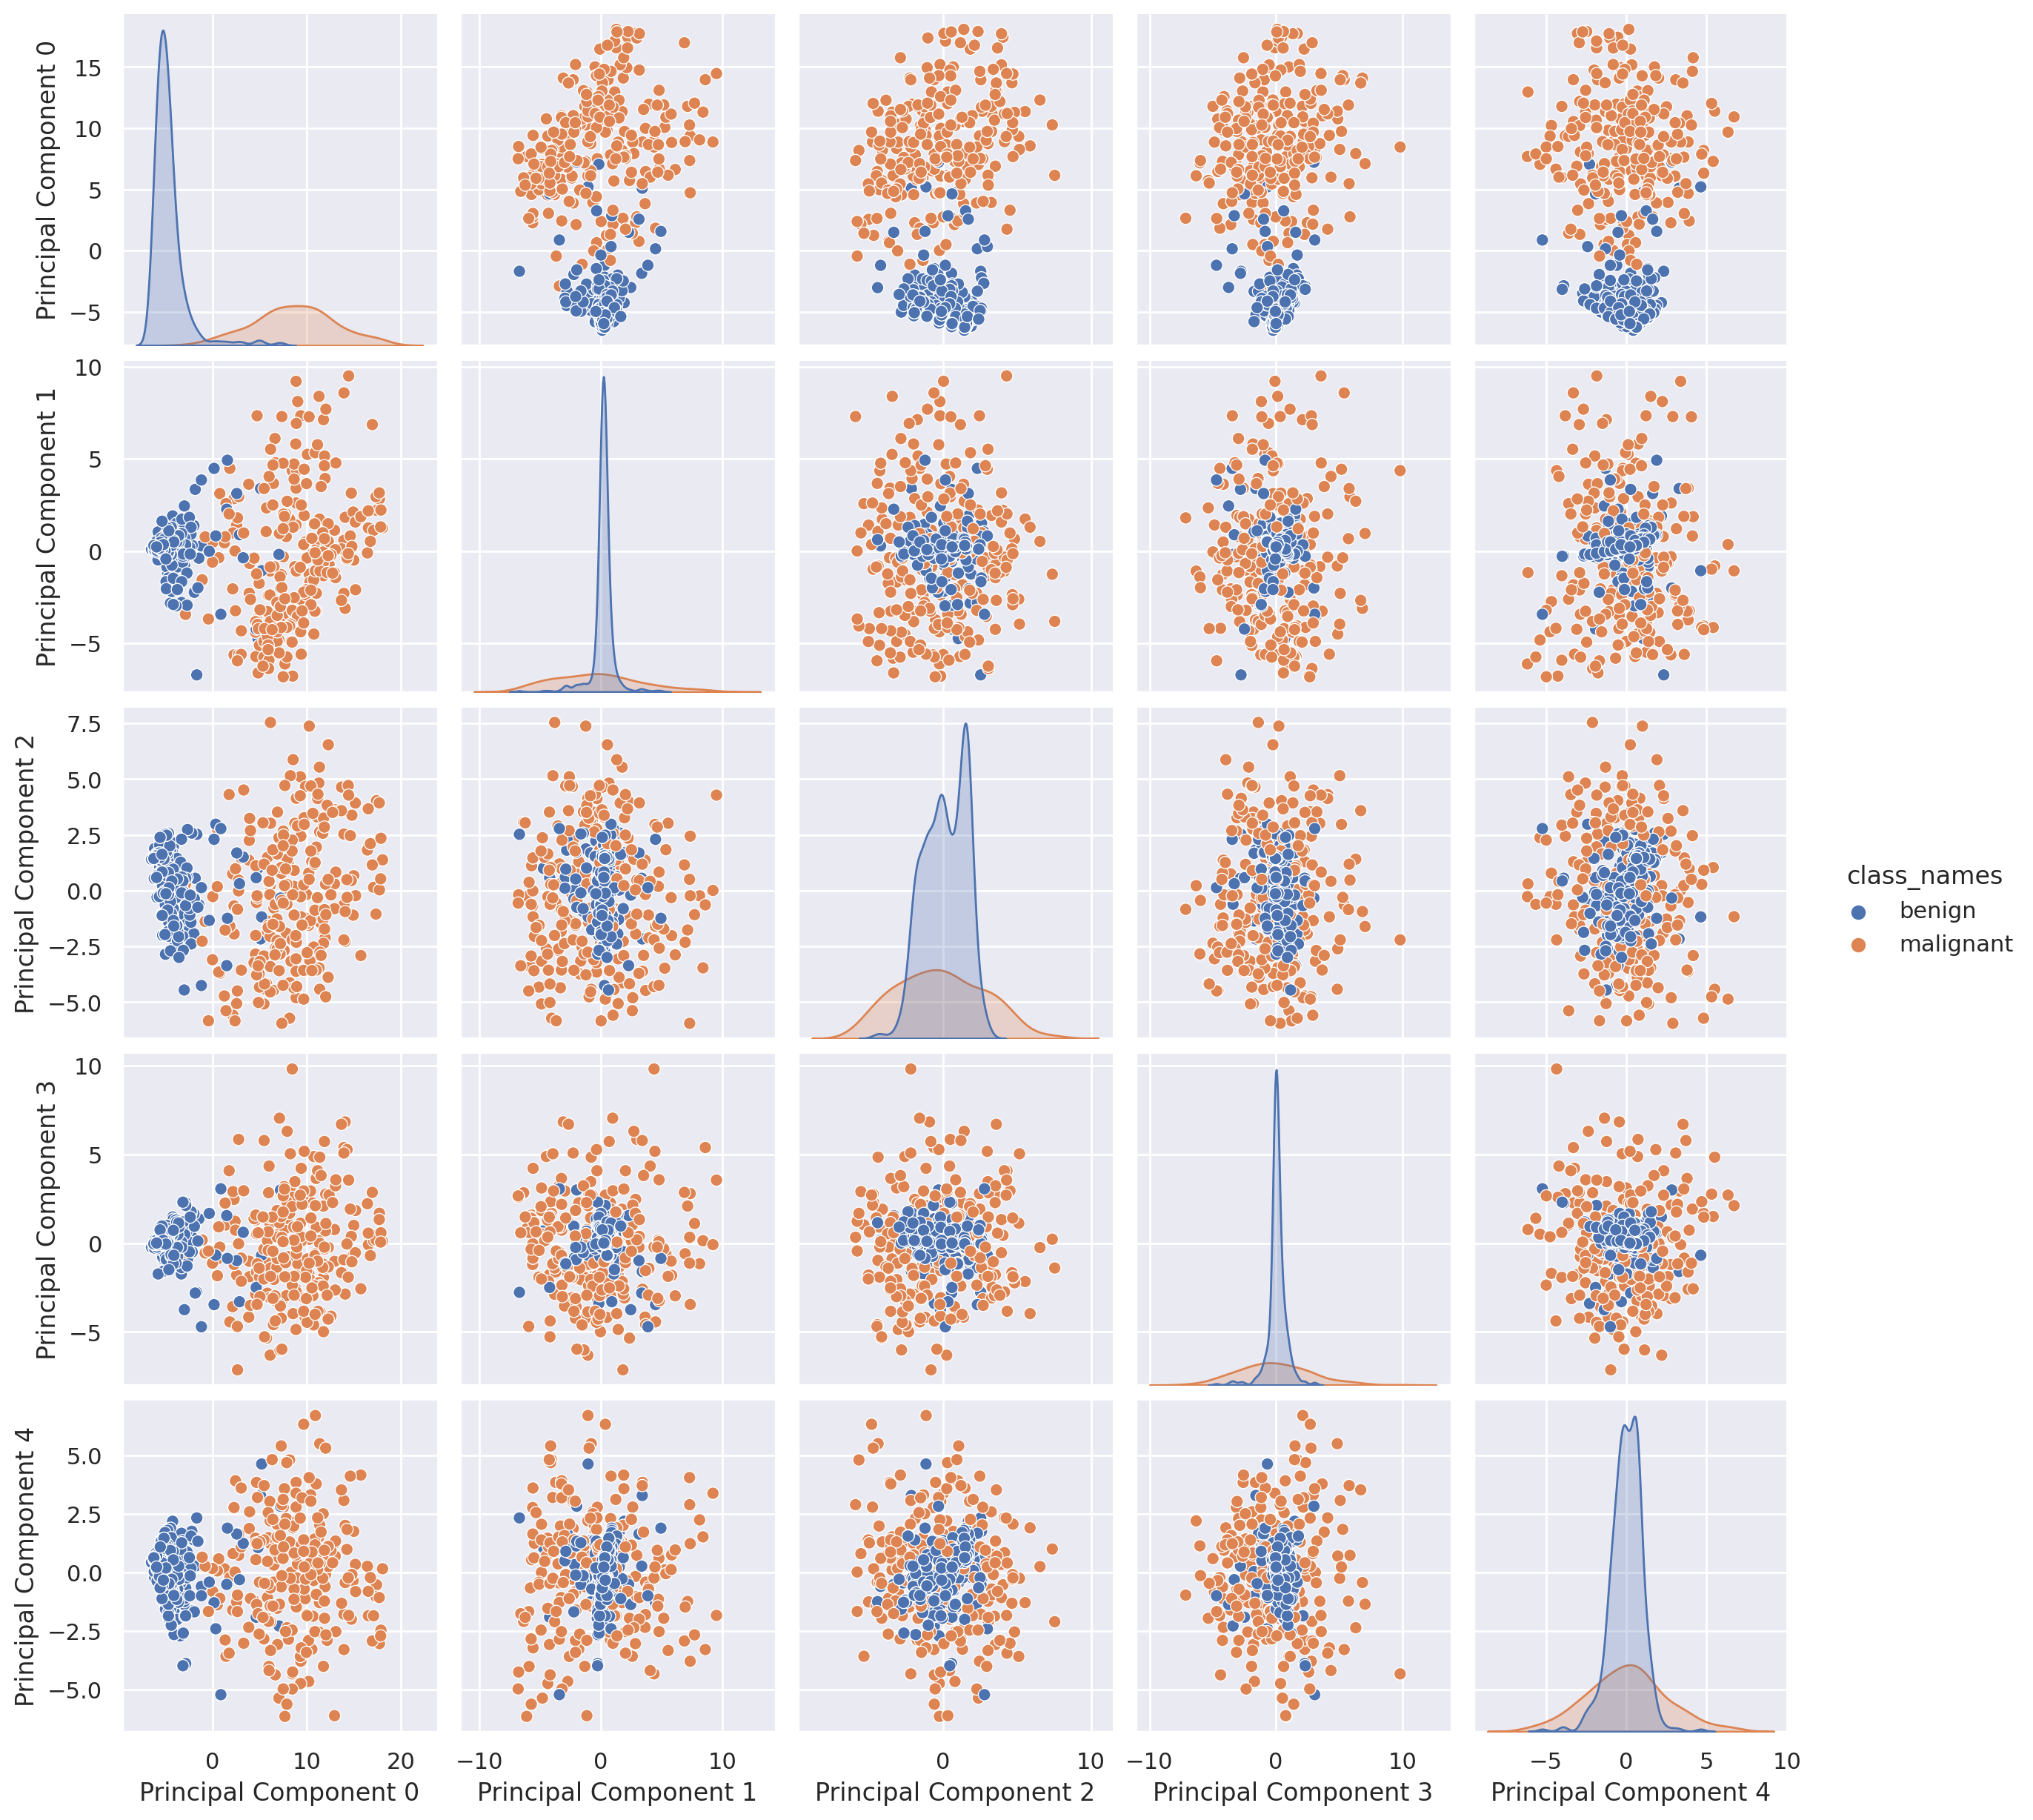

In [36]:
df_most["class_names"] = np.where(df["class"] == 4, "malignant", "benign")

sns.pairplot(df_most, hue="class_names")

### d)

TODO

### e)

TODO

### f)

This could effect PCA because the the dataset is not normalized. The values are so different, that it can effect the variance. 
It would make sense to pre-process the data. A method to do this is to normalize the data. 
This can be done by the code below. 

In [38]:
scaler = sk.preprocessing.StandardScaler()
scaler.fit(df_wo_meta)
scaled = scaler.transform(df_wo_meta)